## Разделение данных

Для того чтобы оценить качество модели, нужно оценить ее работу на данных, которые она еще не видела.

В sklearn для разделения на тренировочную и тестовую выборки есть метод `train_test_split()`

In [1]:
# Импортируем данные
from sklearn.datasets import load_breast_cancer

# Загружаем исходные данные
X, y = load_breast_cancer(return_X_y = True, as_frame = True)

print("Размерность матрицы признаков", X.shape)
print(y.shape)

X.sample(10)

Размерность матрицы признаков (569, 30)
(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
282,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.094640,0.1893,0.05892,...,23.79,28.65,152.40,1628.0,0.15180,0.37490,0.43160,0.22520,0.3590,0.07787
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,15.51,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.020680,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
111,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.060210,0.1735,0.07070,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.026230,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.15480,0.23900,0.21020,0.08958,0.3016,0.08523
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.14120,0.30890,0.35330,0.16630,0.2510,0.09445
389,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.102100,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.01342,0.016990,0.1472,0.05561,...,12.90,20.21,81.76,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.048350,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.021070,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888


In [2]:
# Импорт функции 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

print("Размерность тренировочной выборки:", X_train.shape)
print("Размерность тестовой выборки:", X_test.shape)

Размерность тренировочной выборки: (455, 30)
Размерность тестовой выборки: (114, 30)


## Логистическая регрессия

Логистическая регрессия - вероятностная модель, предсказывающая принадлежность наблюдения какому-либо классу.

Задается при помощи логистической функции: $$f(x) = \frac{1}{1 + e^{-x}}$$

Если хочется узнать математическую базу алгоритма (нужно знать теорию вероятностей): https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F

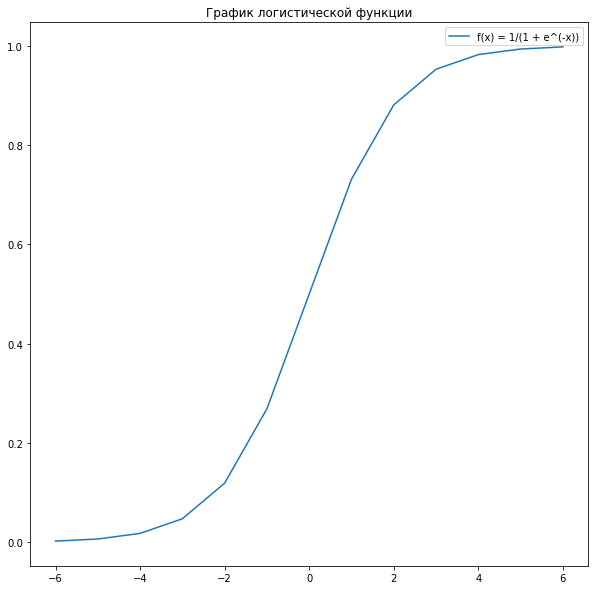

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def log_func(x):
    return 1/(1 + np.exp(-x))

plt.figure(figsize = (10, 10))
plt.plot([x for x in range(-6, 7)], [log_func(x) for x in range(-6, 7)],
        label = 'f(x) = 1/(1 + e^(-x))')
plt.title('График логистической функции')
plt.legend()

plt.show()

В библиотеке sklearn логистическая регрессия является частью класса `linear_model`

Обучим модель на тренировочной выборке

In [4]:
# Импортируем лог. регрессию
from sklearn.linear_model import LogisticRegression

# Создаем модель
model = LogisticRegression(random_state = 42)

model.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Т.к. это задача классификации посмотрим на accuracy и roc_auc_score на тестовых данных

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = model.predict(X_test)

print('Accuracy score:', accuracy_score(pred, y_test))
print('roc_auc_score score:', roc_auc_score(pred, y_test))

Accuracy score: 0.9649122807017544
roc_auc_score score: 0.9672569328433009


## Гиперпараметры и их подбор

У модели логистической немного гиперпараметров, полный список можно посмотреть здесь: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Попробуем увеличить количество итераций `max_iter` с дефолтных 100 на 1000

In [6]:
model_1000 = LogisticRegression(max_iter = 1000, random_state = 42)

model_1000.fit(X_train, y_train)
pred_1000 = model_1000.predict(X_test)

print('Accuracy score:', accuracy_score(pred_1000, y_test))
print('roc_auc_score score:', roc_auc_score(pred_1000, y_test))


Accuracy score: 0.956140350877193
roc_auc_score score: 0.9604729729729731


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


У многих других алгоритмов, например основанных на деревьях принятия решений, о которых мы поговорим на следующем уроке, может быть очень много гиперпараметров и подбирать их оптимальную комбинацию - трудоемкий процесс.

Для этих целей можно использовать встроенные в sklearn методы поиска по сетке `GridSearchCV` и случайного поиска `RandomizedSearchCV`

In [7]:
# Импорт модуля svm
from sklearn import svm

# Импорт функции для поиска по сетке
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# модель
svc = svm.SVC()
# поиск по сетке
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print("Лучшая комбинация гиперпараметров", clf.best_params_)

Лучшая комбинация гиперпараметров {'C': 1, 'kernel': 'linear'}


## Кросс-валидация

Используя обычный `train_test_split` может возникнуть такая ситуация: в обучающую выборку попали лишь объекты одного класса, соответственно модель научится определять только один класс

Чтобы избежать такого и других сценариев связанных со случайным разбиением данных на выборки, применяют **кросс-валидацию**

Типичным примером кросс-валидации является `KFold`

NameError: name 'n_splits' is not defined

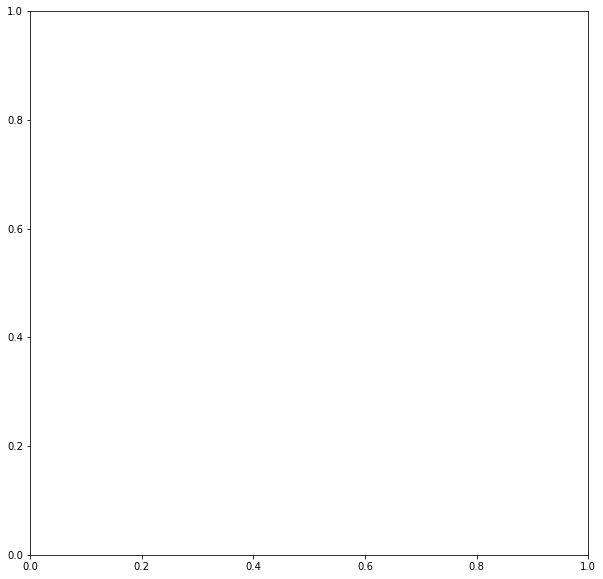

In [8]:
# KFold находится в модуле `model_selection`
from sklearn.model_selection import KFold

# Для визуализации
from matplotlib.patches import Patch


# Функция для визуализации
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax


fig, ax = plt.subplots(figsize = (10, 10))
# Создаем KFold
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)